# Author: Dhanya M A
## GripApril22

# The Sparks Foundation
## Data Science And Business Analytics
### Task 1: Prediction using Supervised ML


### Task Details:
     1. Predict the percentage of a student based on the no. of study hours
     2. What will be the predicted score if a student studies for 9.25 hrs/day

### Importing Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

### Reading Data

In [52]:
#load the student hrs vs score data
student_score=pd.read_csv("http://bit.ly//w-data")
print("Data imported")

Data imported


In [53]:
#preview the data
student_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Inspection

In [54]:
student_score.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [55]:
student_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [56]:
student_score["Scores"].describe()

count    25.000000
mean     51.480000
std      25.286887
min      17.000000
25%      30.000000
50%      47.000000
75%      75.000000
max      95.000000
Name: Scores, dtype: float64

In [57]:
student_score["Hours"].describe()

count    25.000000
mean      5.012000
std       2.525094
min       1.100000
25%       2.700000
50%       4.800000
75%       7.400000
max       9.200000
Name: Hours, dtype: float64

In [58]:
student_score.isnull().sum()  #check for null Values

Hours     0
Scores    0
dtype: int64

### No null values seen or outliers determined. Data cleanup is not needed.

# Data Visualization
## Plot Scatter diagram

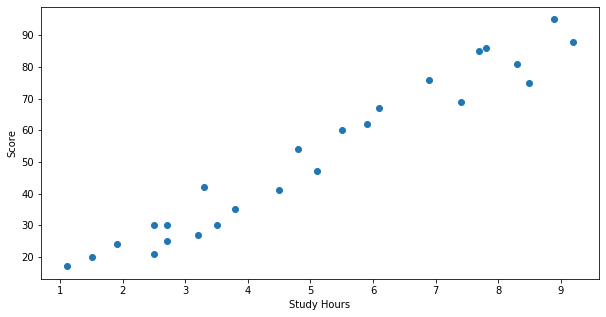

In [61]:
#display scatter_matrix also
plt.figure(figsize = (10,5))
plt.scatter(x=student_score.Hours, y=student_score.Scores)
plt.xlabel("Study Hours")
plt.ylabel("Score")
plt.show();

### Direct relation between the number of study hours and the score is seen

# Model Building

In [95]:
#split the data into train and test
from sklearn.model_selection import train_test_split as split
train, test = split(student_score, test_size = 0.20, random_state = 12)

In [96]:
train.shape

(20, 2)

In [97]:
test.shape

(5, 2)

In [98]:
# fit the model 
X = train[['Hours']] # always needs to be dataframe
y= train.Scores # always a Series

### Train the model

In [99]:
from sklearn.linear_model import LinearRegression
# create a model object
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Prediction and R squared value

### Lets get the prediction for the train set and plot actual vs predicted

C:\Users\dayyappan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\dayyappan\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


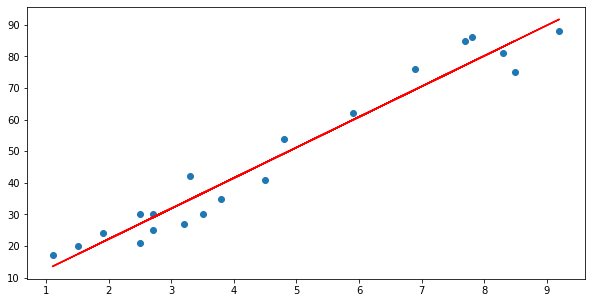

In [100]:
y_cap = lm.predict(train[['Hours']])
plt.figure(figsize = (10,5))
plt.scatter(x=train.Hours, y=train.Scores)
plt.plot(train.Hours, y_cap,color = 'red')
plt.show();

In [101]:
lm.coef_

array([9.65531967])

In [102]:
lm.intercept_

2.8906997426063086

In [103]:
lm.score(X,y)# R squared value

0.9528277512045827

### This means 95% of the variability can be explained by the model. Hence this is a good model

# Plot actual vs predicted comparison graph and find residual

### Predict the test data

In [104]:
y_pred = lm.predict(test[['Hours']])

In [105]:
df1 = pd.DataFrame(y_pred,columns=['Predicted'])
df2=pd.DataFrame(test["Scores"].values,columns=['Actual'])
testCmp=pd.concat([df1, df2], axis=1)
testCmp

,Predicted,Actual
0,74.340065,69
1,55.994958,60
2,61.788150,67
3,52.132830,47
4,88.823045,95


### Plot predicted against the actual scores for the test set

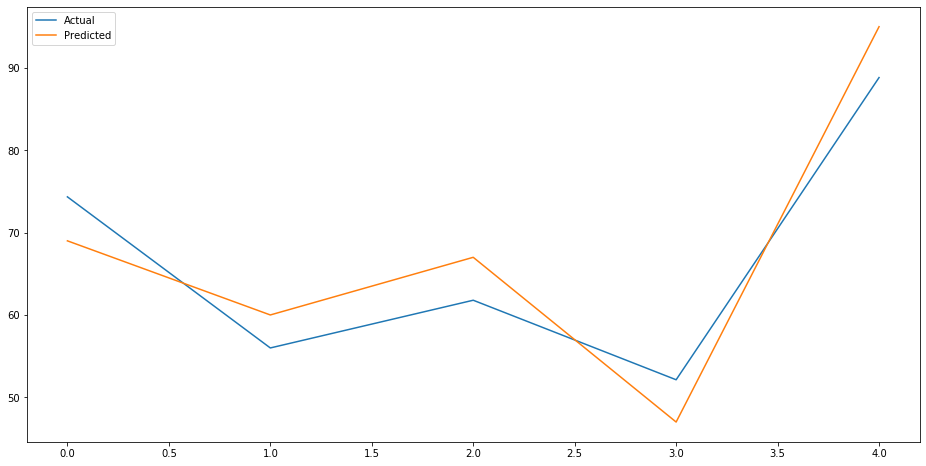

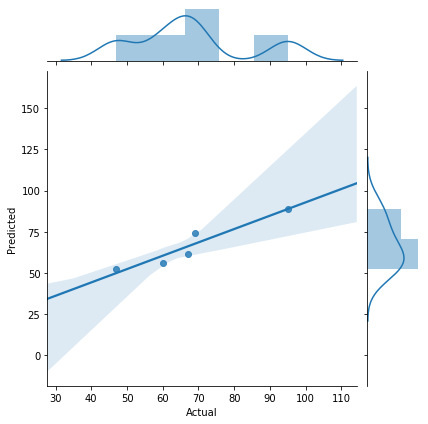

In [106]:
fig1= plt.figure(figsize=(16,8))
testCmp = testCmp.reset_index()
testCmp = testCmp.drop(['index'],axis=1)
plt.plot(testCmp[:])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=testCmp,kind='reg',);

In [107]:
# Arranging and calculating the Residuals
testCmp['residuals'] = testCmp['Actual'] - testCmp['Predicted']
testCmp.head()

,Predicted,Actual,residuals
0,74.340065,69,-5.340065
1,55.994958,60,4.005042
2,61.788150,67,5.211850
3,52.132830,47,-5.132830
4,88.823045,95,6.176955


# What will be the predicted score if a student studies for 9.25 hrs/day?

In [108]:
print("A student studying for 9.25hrs/per day will approximately score: {}".format(lm.predict([[9.25]]).round(2)))

A student studying for 9.25hrs/per day will approximately score: [92.2]


# Evaluating the model

In [109]:
# mean absolute error
from sklearn import metrics
print('Mean absolute error is: ', metrics.mean_absolute_error(test["Scores"].values, y_pred))

Mean absolute error is:  5.173348586293498
